In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [15]:
from tensorflow.keras.datasets import boston_housing
data=boston_housing.load_data()
(x_train,y_train),(x_test,y_test) = data

In [16]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import IsolationForest

# outlier_detector = IsolationForest(contamination=0.15)  # Adjust contamination as needed
# outliers = outlier_detector.fit_predict(data)
# data = data[outliers != -1]  # Remove outliers from the dataset


In [17]:
# cols = "area bedrooms bathrooms	stories mainroad guestroom basement hotwaterheating	airconditioning	parking	prefarea furnishingstatus"
# x = data[cols.split()]
# y = data["price"]
# x = x.values
# y = y.values

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()  
x_train = scaler.fit_transform(x_train)
x_test =  scaler.fit_transform(x_test)

# x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0.2,random_state=69
# )

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2  # Import the L2 regularization

# Define the regularization strength
l2_lambda = 0.01

# Define your model with kernel regularization for each layer
model = Sequential(
    [
        Dense(units=128, activation="relu", kernel_regularizer=l2(l2_lambda)),
        Dense(units=64, activation="relu", kernel_regularizer=l2(l2_lambda)),
        Dense(units=32, activation="relu", kernel_regularizer=l2(l2_lambda)),
        Dense(units=1, activation="linear", kernel_regularizer=l2(l2_lambda))
    ]
)
# Compile the model with the Adam optimizer and loss function
model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError())
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


11/11 [==============================] - 1s 15ms/step - loss: 353.8645 - val_loss: 252.2995
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 105.7276 - val_loss: 69.3679
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 42.2993 - val_loss: 27.3060
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 24.2768 - val_loss: 20.4220
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 18.0450 - val_loss: 17.5754
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 15.8861 - val_loss: 14.2467
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 15.7255 - val_loss: 19.9427
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 14.7030 - val_loss: 14.5036
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 12.7388 - val_loss: 14.9060
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 12.2528 - val_loss: 14.71

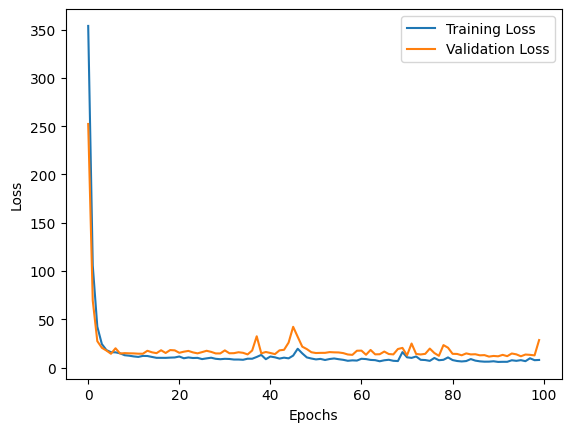

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [22]:

model.fit(x_train, y_train, epochs=500)


Epoch 1/500
 1/13 [=>............................] - ETA: 0s - loss: 13.9216

13/13 [==============================] - 0s 4ms/step - loss: 11.6480
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 7.5787
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 7.4181
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 8.0666
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 6.7040
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 6.8947
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 7.7663
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 7.0934
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 6.4501
Epoch 10/500
13/13 [==============================] - 0s 625us/step - loss: 6.0389
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 5.7247
Epoch 12/500
13/13 [==============================] - 0s 1ms/step - loss: 5.6553
Epoch 13/500
13/13 [==========================

In [26]:
predictions = model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


In [27]:
len = x_test.shape[0]
error = 0 
for i in range(len):
    error += (predictions[i][0] - y_test[i])**2
test_error = error/(2*len)

In [28]:
test_error

6.576542030780911